In [67]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

In [57]:
def integrand(x):
    return 0.5*x

(result, error) = quad(integrand, 1, 1)
print(result)

(result, error) = quad(integrand, 0, 1)
print(result)

(result, error) = quad(integrand, 0, 2)
print(result)

0.0
0.25
1.0


In [58]:
lunch = np.genfromtxt('lunch_wait_time.csv', delimiter=',')
sat = np.genfromtxt('SAT.csv', delimiter=',')
age = np.genfromtxt('student_age.csv', delimiter=',')
print(lunch.shape)
print(sat.shape)
print(age.shape)

(200,)
(800,)
(800,)


Average: 1.0405


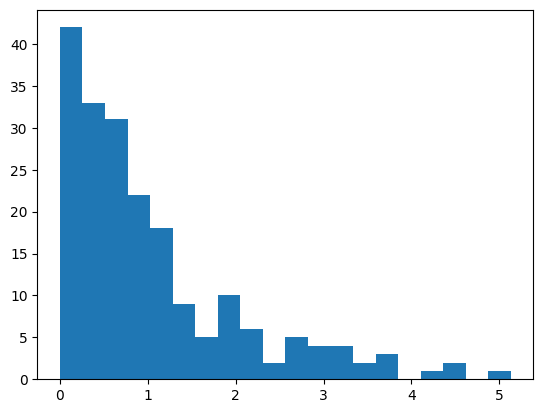

In [59]:
avg = np.sum(lunch) / lunch.shape[0]
print("Average:", avg)

n, bins, patches = plt.hist(lunch, 20)
plt.show()

Average: 1147.82875


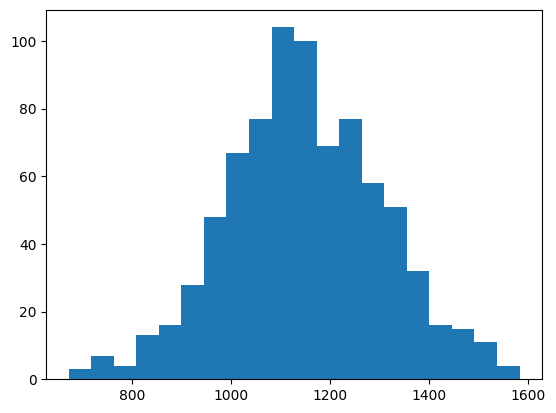

In [60]:
avg = np.sum(sat) / sat.shape[0]
print("Average:", avg)

n, bins, patches = plt.hist(sat, 20)
plt.show()

Average: 19.931625


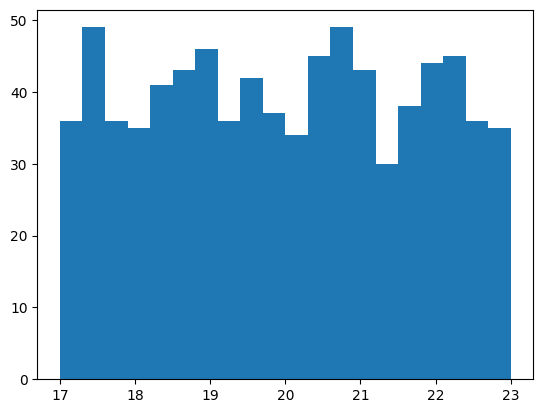

In [61]:
avg = np.sum(age) / age.shape[0]
print("Average:", avg)

n, bins, patches = plt.hist(age, 20)
plt.show()

In [62]:
# probability someone will score higher than 1300 on SAT
total = 0
above_1300 = 0
for i in sat:
    total += 1
    if i > 1300:
        above_1300 += 1

print(above_1300 / total)

0.17375


In [63]:
# probability you will wait more than 3 minutes
total = 0
above_3min = 0
for i in lunch:
    total += 1
    if i > 3:
        above_3min += 1

print(above_3min / total)

0.065


In [64]:
# probability someone is younger than me (21)
total = 0
below_21 = 0
for i in age:
    total += 1
    if i < 21:
        below_21 += 1

print(below_21 / total)

0.685


In [65]:
a = norm.ppf(0.95, loc=1000, scale=200)
a
# you would need above a 1329

1328.9707253902943

In [66]:
def male(x):
    return norm.cdf(x, loc=70, scale=3)

def female(x):
    return norm.cdf(x, loc=64.5, scale=2.5)

print(1 - male(67))
print(female(67))
print(norm.ppf(0.9, 64.5, 2.5))

# 84% of males are taller than 67 inches
# 84% of females are shorter than 67 inches
# a male would need to be around 67.7 inches to play chess with 90% of females

0.8413447460685429
0.8413447460685429
67.7038789138615


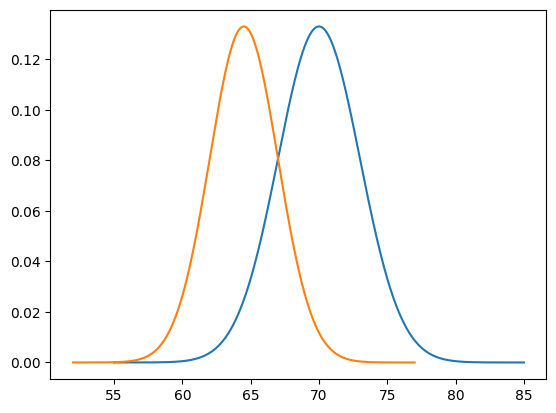

In [73]:
mu_m = 70
sig_m = 3

mu_f = 64.5
sig_f = 2.5

x_m = np.linspace(55, 85, 1000)
x_f = np.linspace(52, 77, 1000)

pdf_m = stats.norm.pdf(x_m, mu_m, sig_m)
pdf_f = stats.norm.pdf(x_m, mu_m, sig_m)

plt.plot(x_m, pdf_m)
plt.plot(x_f, pdf_f)
plt.show()